# Audio-Processing: 101 - Baby Steps

<a id="0"></a> <br>
 # Table of Contents  
1. [Onda Sonora](#1)
    1. [Audio Digital](#2)
2. [Gerando uma onda senóide](#3)
3. [Primeira Intuição](#4)
4. [Taxa de Amostragem](#5)
    1. [Frequências mais comuns](#6)
5. [Volume](#7)
6. [Tonalidade](#8)
7. [Bit Depth](#9)
8. [Bit Rate](#10)
9. [Duração](#11)
10. [Frames](#12)
11. [Canais e Trilhas de audio](#13)
12. [Salvando um arquivo PCM raw](#14)
12. [Validando as informações no ffprobe](#15)
12. [Convertedo para wav](#16)
13. [Abrindo um arquivo wave](#17)


#### Introdução

<a id="1"></a>

##### Onda Sonora
É a propagação de uma "onda mecânica acustica", longitudinal(**1) de forma cincuncêntrica, essa onda viaja somente por meios materiais (sólidos, liquidos ou gasosos). [wiki Ondas_longitudinais](https://pt.wikipedia.org/wiki/Ondas_longitudinais)





| [visualizando frequências de audio em meios sólidos](https://www.youtube.com/watch?v=Q3oItpVa9fs) |  |
| ---------------- | ---------------- |
| ![thumnail do video](pictures/water-reaction.png) |  |


Quando os nossos ouvidos captam um som, e depois desse som ser processado pelo no nosso cérebro, podemos ter o desejo de ouvi-lo novamente, e a qualquer momento. Isso só será possível através da capacidade de reproduzir novamente a onda sonora.

Para isso, essa onda sonora precisa ser capturada, processada e depois armazenada. O equipamento utilizado para converter sinal analógico em sinal digital é chamado conversor AD.


| https://e2e.ti.com/search?q=ADS112U04 |  |  |
| ---------------- | ---------------- | ---------------- |
| conversor AD | ![Conversor AD](pictures/ad.png) | ![ADS112U04](pictures/ADS112U04.jpg) | |

<p></p>

O Conversor processa uma amostra do som a uma taxa de dezenas de milhares de vezes por segundo.
Nesse processo de conversão o audio sofre perdas, quando convertido do domínio continuo(infinito) para o discreto(finito) e dessa forma pode ser armazenado.
Esse processo de conversão atingiu um grau elevado de precisão que essa perda não é percebida.

![continuous vs discrete](pictures/cont_desc.jpg)

<a id="2"></a>

##### Audio Digital

* Audio digital, consiste na representação digital de uma onda sonora por meio de uma sequência binaria.
  * Aplicação: Armazenamento e reprodução por meio de diversas midias: cd, internet, wav, mp3.
* Com a conversão do analógico para o digital nasceu o Processamento de Sinais Digitais, DSP. Digital Signal Processing.
* O que é processamento de sinais de audio?
  * é toda alteração intencional em um sinal de audio.

Exemplos de aplicações:

* sintese sonora (Sound Syntesis)
  * É a criação artificial de um sinal de audio, você pode reproduzir um som da natureza, um instrumento musical

![wavetables](pictures/wavetable.gif)

  
* Compressão de Audio
  * Algoritmos de Compressão podem reduzir  o tamanho dos arquivos sem comprometer a qualidade. mp3, aac, vorbis. ou o Flac sem perda.

![continuous vs discrete](pictures/audio_formats.jpg)

* Filtros
  * Tecnica usada para modificar a frequencia de um audio.
    A equalização é um tipo básico de filtro, é possível ajustar a frequencia de vários componentes do audio, como os médios, graves e agudos.
* Efeitos de Audio
  reverb, delay, flanger, chorus.



|  |  |
| ---------------- | ---------------- |
| guitar synth | ![efeitos de guiarra](pictures/guitar-synthesizer.png) |


<p></p>

* Processamentos de Voz
  * Afinar a voz em tempo real
  * clonar uma pessoa.

|                |                                       |
| ---------------- | --------------------------------------- |
| voice auto tune | ![efeitos de guiarra](pictures/autotune.png) |

Além de Sound synthesis na área musical e Voice synthesis na área de inteligência artificial, o estudo e o desenvolvimento de ferramentsas para audio podem contribuir em muitas outras áreas como:


* Melhoria na Qualidade( Audio Enhancement )
    * Telecomunicações

* Efeitos
    * Cinema
    * Games

* Streaming
    * Novos codecs de audio

* Compressão
    * Novos algorítmos e técnicas de compressão

* Simulação
    * Acustica
    * Comportamento da Onda
 
* Embarcados
    * Desenvolvimento de drivers
    * Segurança
    * Área médica

#### Simulando a conversão Analógica/Digital

<a id="3"></a>

##### Gerando uma onda senoide

In [307]:
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import Output, GridspecLayout
import numpy as np

In [308]:
amplitude = .8
frequencia = 2
fase_inicial = np.pi/2
taxa_amostragem = 100

tempo = np.arange(-1, 1, 1.0/taxa_amostragem)

x = amplitude * np.sin(2*np.pi*frequencia*tempo+fase_inicial)

%%latex
$$
x(t) = 0.8 \sin(2\pi f t + \frac{\pi}{2})
$$

%%latex

Given:

Amplitude: 
$A = 0.8$

Frequency: 
$f = 2$

Initial Phase: 
$\phi_0 = \frac{\pi}{2}$

Sampling Rate: 
$f_s = 100$

Time: 
$t$ ranging from -1 to 1 at a sampling rate of 100 samples per second ($t = -1, -0.99, -0.98, ..., 0.99$)

The mathematical formula for $x$, which represents the sinusoidal signal, is:

$$
x(t) = 0.8 \sin(2\pi f t + \frac{\pi}{2})
$$


%%end


Trocando em miudos como as ondas são circuncêntricas precisamos da função seno que vai nos retornar seno de um ângulo gerando uma curva senoidal a cada posição no tempo.

Text(0, 0.5, 'amplitude')

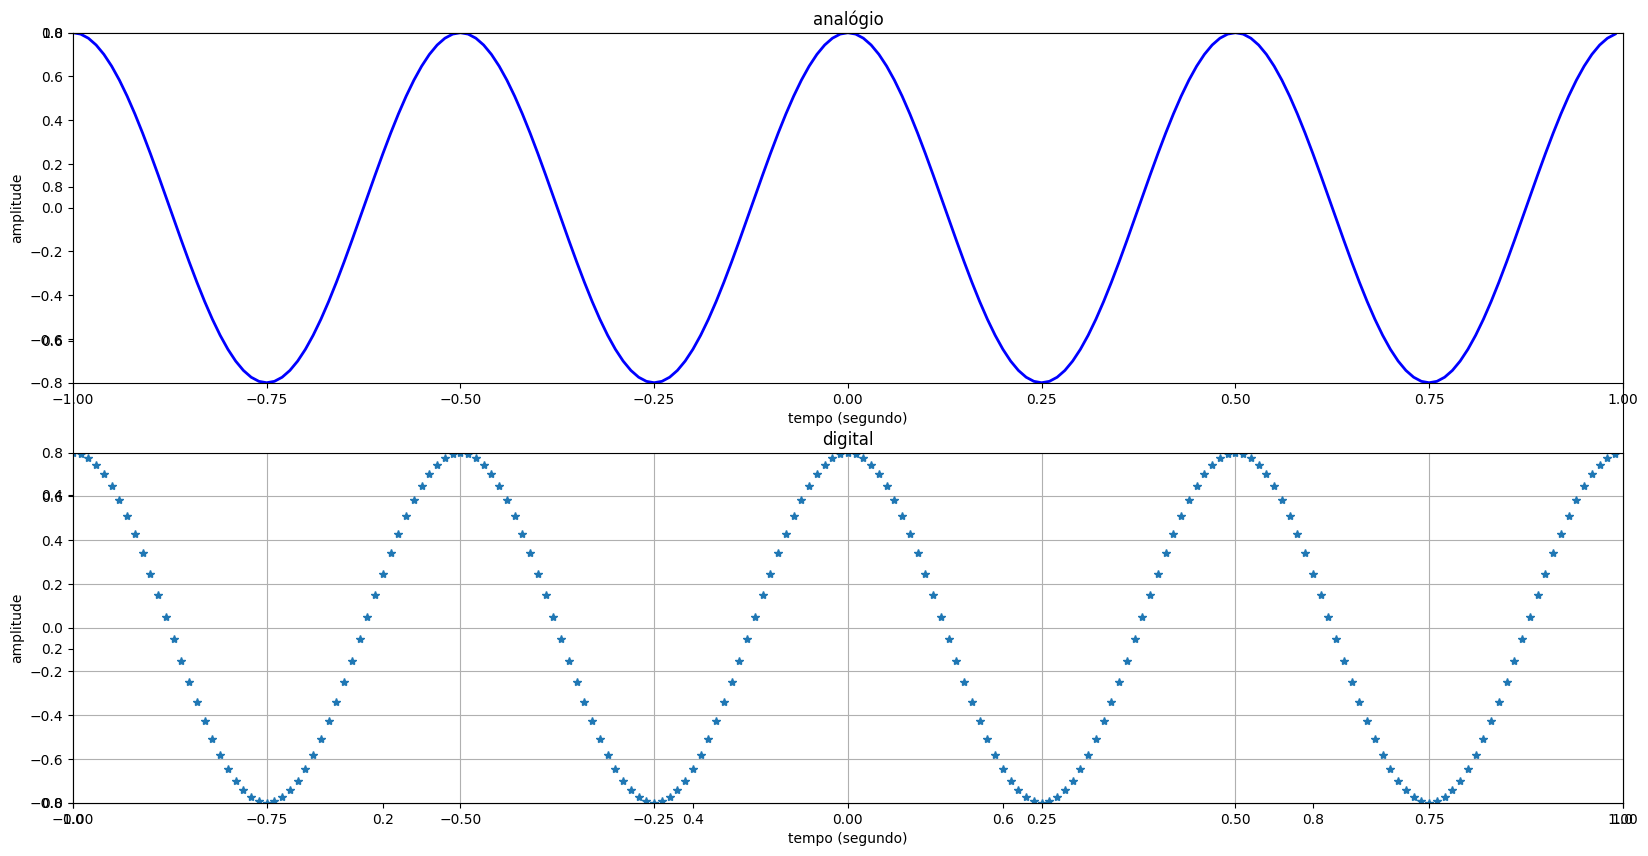

In [309]:
plt.subplots(figsize=(20, 10))

ax1=plt.subplot(2, 1, 1)
ax1.plot(tempo, x, 'b',lw=2)
plt.axis([-1,1,-0.8,0.8])
ax1.set_title('analógio')
ax1.set_xlabel('tempo (segundo)')
ax1.set_ylabel('amplitude')

ax2=plt.subplot(212, sharex=ax1)
ax2.plot(tempo, x, '*', lw=2)
plt.axis([-1,1,-0.8,0.8])
plt.grid(True)
plt.title('digital')
plt.xlabel('tempo (segundo)')
plt.ylabel('amplitude')

## Desenhando outros padrões de sinal

Como vimos anteriormente com a criação do processamento de sinais, vários algorítmos surgiram e existem várias maneiras de reproduzir sons e encontrar diferentes padrões.

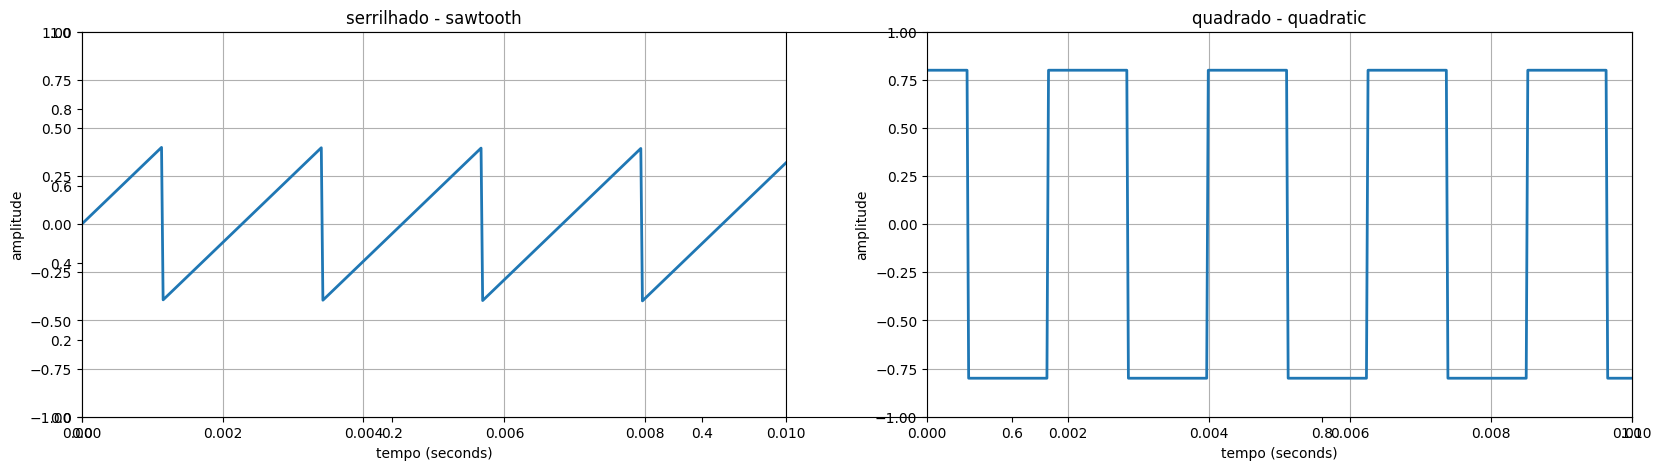

In [310]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi/2
duracao = 1.0
taxa_amostragem = 44100

t = np.linspace(0, duracao, int(taxa_amostragem * duracao), endpoint=False)

sawtooth_wave = amplitude * (t * frequencia - np.floor(0.5 + t * frequencia))

quadratic_wave = amplitude * np.sign(np.sin(2 * np.pi * frequencia * t + fase_inicial))


plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.title('serrilhado - sawtooth')
plt.plot(t, sawtooth_wave, linewidth=2)
plt.axis([-.0, 1/100, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('quadrado - quadratic')
plt.plot(t, quadratic_wave, linewidth=2)
plt.axis([-.0, 1/100, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')
plt.grid(True)

In [311]:
ipd.display(ipd.Audio(data=sawtooth_wave, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=quadratic_wave, rate=taxa_amostragem))

<a id="4"></a>

## Primeira Intuição

|                |                                       |
| ---------------- | --------------------------------------- |
| **First Step** | ![primeiro passo](pictures/step.jpeg) |

<p></p>

> ### Algumas das propriedades do Audio Digital
>
> 1. Taxa de Amostragem (Sample Rate)
> 2. Volume
> 3. Tonalidade (Pitch)
> 4. Duração
<p></p>

----------

<p></p>

> 5. Quantidade de bits (Bit Depth)
> 6. Taxa de Bits (Bit Rate)
> 7. Armazenamento x estrutura de dados
> 8. Frame x Sample x Chunk Size


<a id="5"></a>

### Taxa de amostragem -  Sample Rate (sample frequency)

<p>Uma amostra ou sample é o estado original analógico da onda sonora em um certo periodo do tempo</p>
<p>Uma série de amostras conectadas descrevem um trecho de audio</p>

> Taxa de amostragem é o número de amostras por uma medida de tempo(normalmente em segundos), quando estamos captando um sinal continuo e analógio para um sinal discreto e digital.

A `taxa de amostragem` também é chamada de:
  - Frequencia de amostragem(samplig rate)
  - Taxa de recuperação(recevery rate). 
  - Normalmente medido em HZ hertz. **41.200Hz**

In [312]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo1 = np.arange(start=0, stop=duracao, step=duracao/taxa_amostragem, dtype=np.float32)
tempo2 = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False, dtype=np.float16)

x1 = amplitude * np.sin(2 * np.pi * frequencia * tempo1 + fase_inicial)
x2 = amplitude * np.sin(2 * np.pi * frequencia * tempo2 + fase_inicial)

print(f'{len(tempo1)} Hz')
print(f'{len(tempo2)} Hz')

44100 Hz
44100 Hz


Text(0, 0.5, 'amplitude')

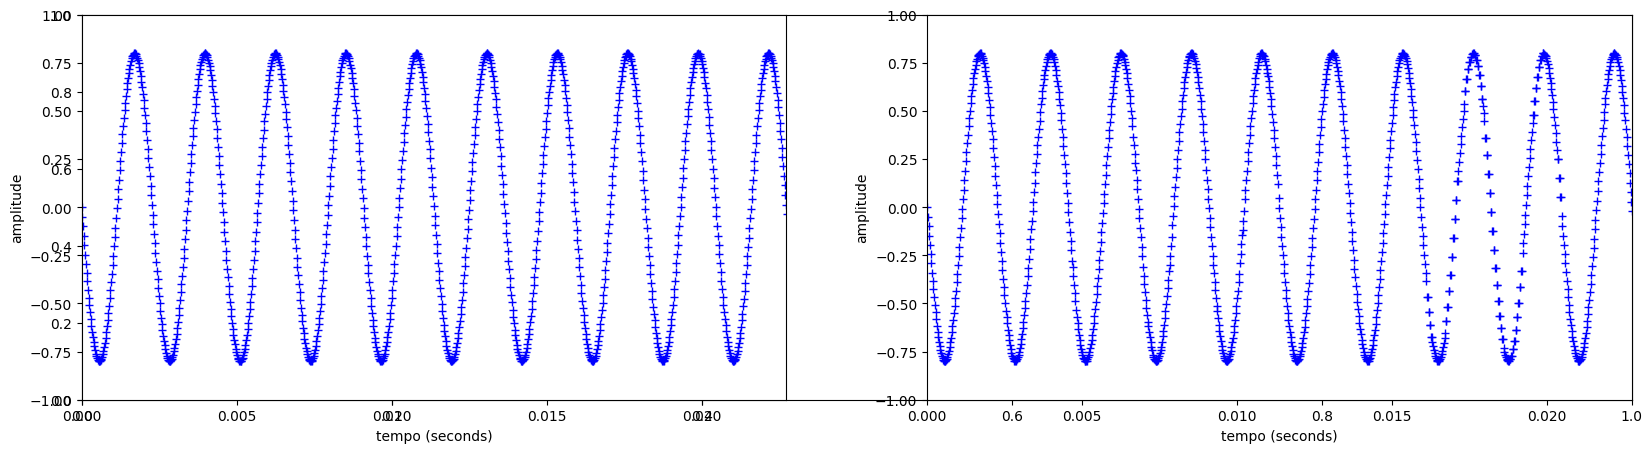

In [313]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(tempo1, x1, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')

plt.subplot(1,2,2)
plt.plot(tempo2, x2, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [314]:
import IPython.display as ipd

ipd.display(ipd.Audio(data=x1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=x2, rate=taxa_amostragem))

In [315]:
def draw_wave(tempo, audio, style, duracao, zoom, amplitude):
    plt.plot(tempo, audio, style, linewidth=2)
    plt.axis([-.0, duracao/zoom, -amplitude, amplitude])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

In [316]:
def create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem):
    vetor_tempo = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False)
    two_phi = 2 * np.pi

    x = amplitude * np.sin(two_phi * frequencia * vetor_tempo + fase_inicial)
    return vetor_tempo, x

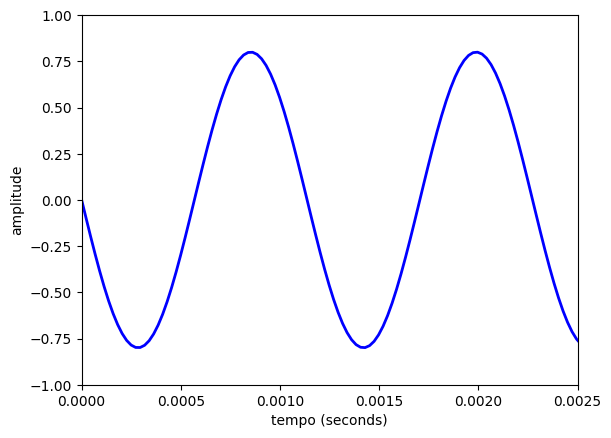

In [317]:
amplitude = .8
frequencia = 880
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo, audio = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))
draw_wave(tempo, audio, 'b', duracao, 400, amplitude+.2)

<a id="6"></a>

#### Frequências mais comuns

| Sample Rate | Mais usado em | OBS |
| ------------- | ------------- | ------------- |
| 8.000 Hz    | ligações telefonicas, walkie-talkie, e transmissões wireless |  |
| 11.025 Hz   | format PCM de menor qualidade, áudio MPEG e análise de subfaixas de subwoofer | Um quarto da taxa de amostragem de CDs de áudio |
| 16.000 Hz   | Extensão da frequência de banda larga sobre o padrão de 8.000 Hz para telefones Usado na maioria dos produtos modernos |  |
| 22.050 Hz   | usado para PCM de menor qualidade, áudio MPEG e análise em baixa frequência | Metade da taxa de amostragem de CDs de áudio |
| 32.000 Hz   | Usado em videocassetes digitais miniDV, fitas de vídeo com canais adicionais de áudio, DAT (modo LP), microfones sem fio digitais de alta qualidade |  |
| 44.056 Hz   | Usado por áudio digital sincronizado a sinais de vídeo coloridos NTSC |  |
| 44.100 Hz   | Padrão para CD de áudio, também amplamente usado com áudio MPEG-1 (VCD, SVCD, MP3) |  |
| 48.000 Hz   | Taxa padrão de amostragem de áudio usada em equipamentos de vídeo digital profissional, como gravadores de fita, servidores de vídeo e mesas de mixagem. | Frequência comum em equipamentos de áudio profissional |

[wiki Sampling](https://en.wikipedia.org/wiki/Sampling_(signal_processing)

<a id="7"></a>

#### **Volume**

É a amplitude de uma onda sonora, uma amplituda alta, produz sons mais altos, enquanto baixas amplitudos sons mais baixos.


| origem | https://www.apple.com/ca/sound/ |
| ---------------- | --------------------------------------- |
| amplitude/volume | ![volume](pictures/sounddiagram.gif) |



In [318]:
seconds = 3.0
taxa_amostragem = 22050
tonalidade = 440

amplitude_variavel = np.logspace(-3, 0, int(seconds*taxa_amostragem), endpoint=False, base=10.0)

tempo_array = np.linspace(0, seconds, int(seconds*taxa_amostragem), endpoint=False)
audio = amplitude_variavel*np.sin(2* np.pi * tonalidade * tempo_array)

a função logspace vai gerar um espaço com valores de 0.001 até 1

Text(0, 0.5, 'amplitude')

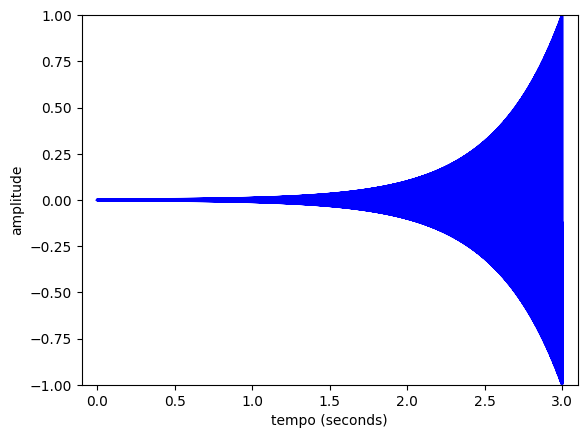

In [319]:
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))

plt.plot(tempo_array, audio, 'b',lw=2)
plt.axis([-0.1, 3.1, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [320]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

win_len_sec = 0.2
power_db = compute_power_db(audio, Fs=taxa_amostragem, win_len_sec=win_len_sec)

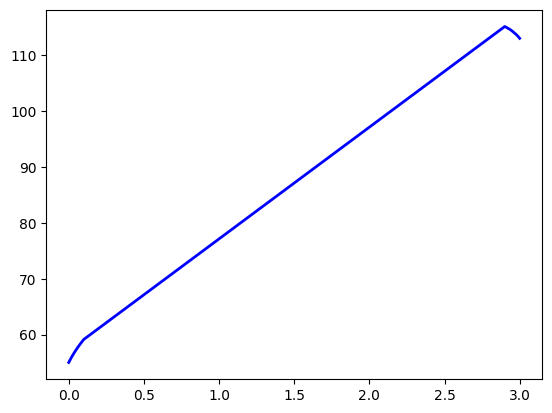

In [321]:
plt.plot(tempo_array, power_db, 'b',lw=2)

<a id="8"></a>

#### **Tonalidade** - Pitch

É a frequencia das ondas sonoras ou o número de ciclos por segundo medido em Hz. Frequencias mais altas produzem sons mais agudos, e baixas frequências produzem sons mais graves.

In [322]:
def draw_subplot(data1, x1, data2, x2):
    plt.subplots(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot(data1, x1, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

    plt.subplot(1,2,2)
    plt.plot(data2, x2, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

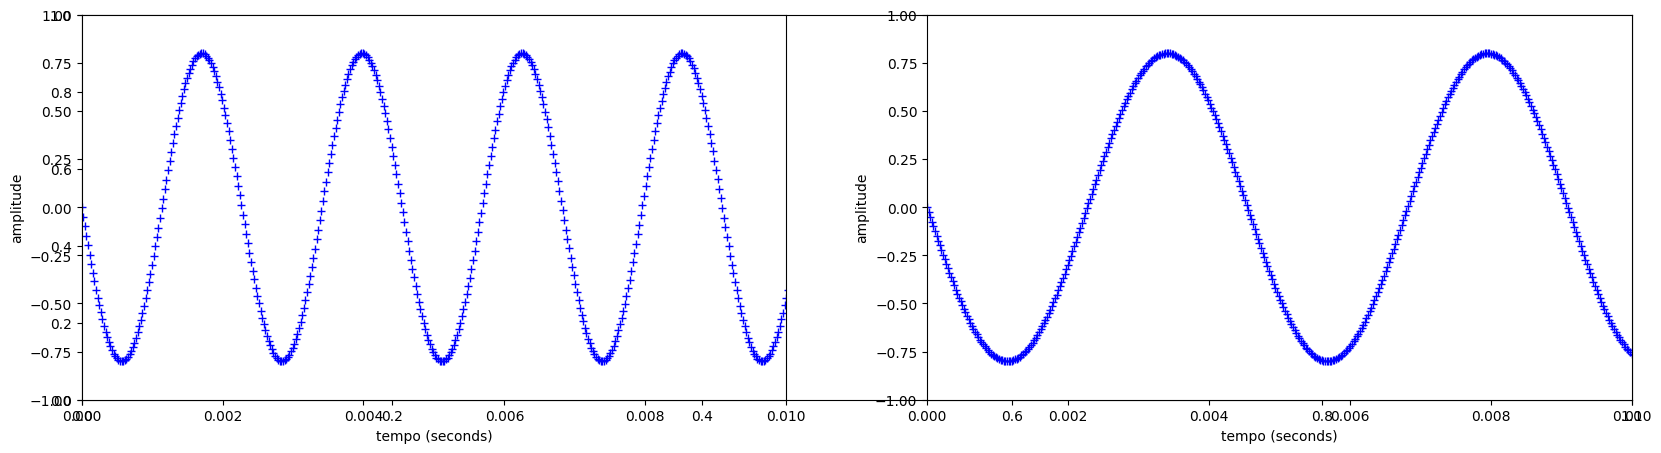

In [323]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo1, audio1 = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
tempo2, audio2 = create_audio(amplitude, frequencia//2, fase_inicial, duracao, taxa_amostragem)

ipd.display(ipd.Audio(data=audio1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=audio2, rate=taxa_amostragem))
draw_subplot(tempo1, audio1, tempo2, audio2)

### Determinando o período da onda

Existem várias maneiras de extrair o período de uma onda, a técnica mais comum é o cruzamento pelo zero, onde identificamos os pontos onde a onda cruza o eixo zero(positivo para negativo e vice-versa)

Calculamos a diferença entros os tempos desses pontos consecutivos e o período vai ser a média entre essas diferenças.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Período médio: 0.0011363407706654904 segundos
duração: 0.9988435374149661 segundos
duração exata: 1.0 segundos


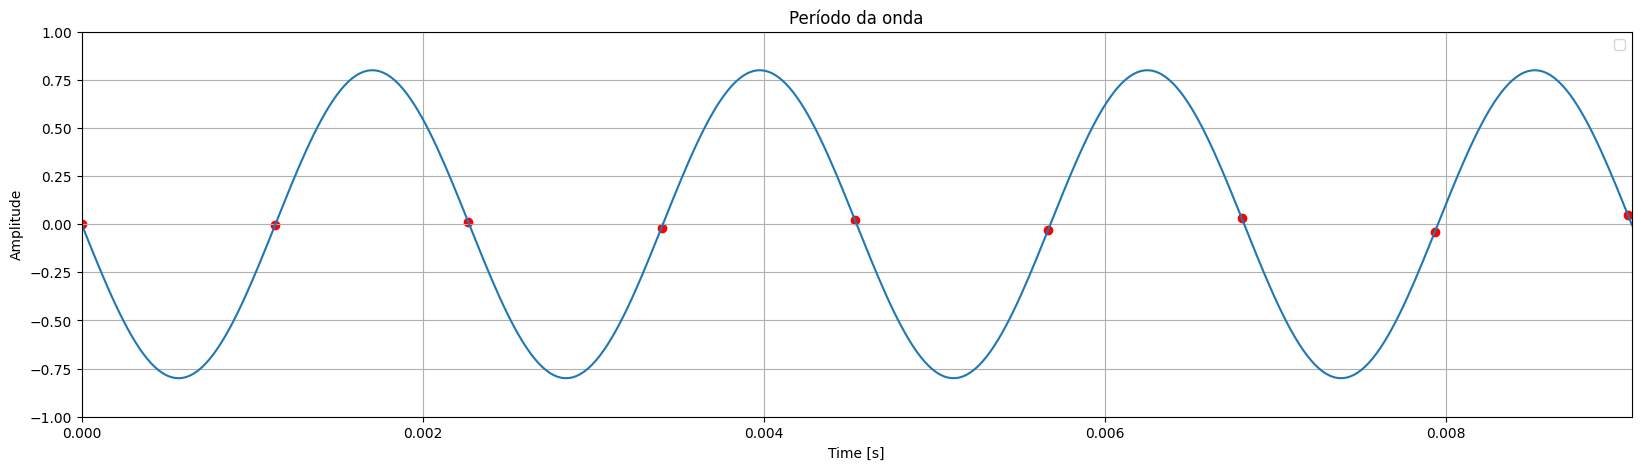

In [324]:
cruzou_zero = np.where(np.diff(np.sign(audio1)))[0]
periodos = np.diff(tempo1[cruzou_zero])
periodo_medio = np.mean(periodos)

print(f"Período médio: {periodo_medio} segundos")


print(f"duração: {periodo_medio * len(periodos)} segundos")

numero_amostras = len(audio1)
duracao_exata = numero_amostras / taxa_amostragem
print(f"duração exata: {duracao_exata} segundos")

plt.subplots(figsize=(20, 5))
plt.plot(tempo1, audio1)
plt.scatter(tempo1[cruzou_zero], audio1[cruzou_zero], color='red')
plt.axis([-.0, 1/110, -1.0, 1.0])
plt.title('Período da onda')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Fase da onda em 0.2011363407706655s: num raio de -3.14157440710785


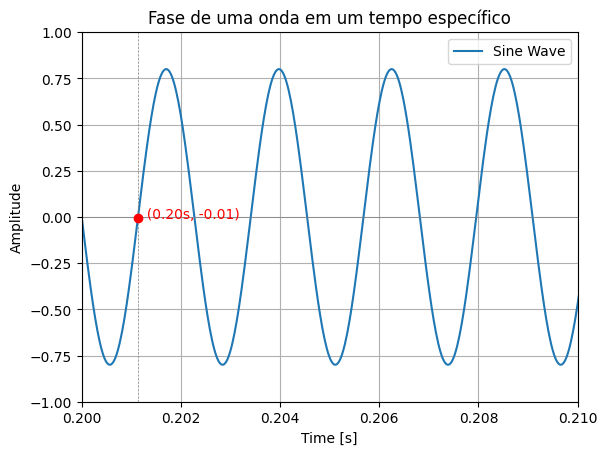

In [325]:
def find_phase_at_time(amplitude, frequency, sampling_rate, wave, specific_time):
    specific_index = int(specific_time * sampling_rate)
    value_at_time = wave[specific_index]
    calculated_phase = np.arcsin(value_at_time / amplitude) - 2 * np.pi * frequency * specific_time
    calculated_phase = (calculated_phase + np.pi) % (2 * np.pi) - np.pi
    
    return calculated_phase, specific_index


specific_time = 0.2 + (periodo_medio)
phase_at_specific_time, specific_index = find_phase_at_time(amplitude, frequencia, taxa_amostragem, audio, specific_time)
print(f"Fase da onda em {specific_time}s: num raio de {phase_at_specific_time}")


plt.plot(tempo1, audio1, label='Sine Wave')
plt.scatter(tempo1[specific_index], audio1[specific_index], color='red', zorder=5)
plt.text(tempo1[specific_index], audio1[specific_index], f'  ({specific_time:.2f}s, {audio1[specific_index]:.2f})', color='red')
plt.axis([.2, .21, -1.0, 1.0])
plt.title('Fase de uma onda em um tempo específico')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(specific_time, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

<a id="9"></a>

#### **Bit Depth** - Subchunk Size
  * Indica o número de bits usado para representar cada sample
  * Maiores valores de bit depth permitem uma representação maior da amplitude do audio
  * No pão nosso de cada dia significa as tipagens: int8, int16, int32, float16, float, double

<p> </p>

| Type | BIT Depth | # of possible values | min ~ max |
| ------ | ------ | ----------------------------------- | ------- |
| int/float | 32-bit | 4,294,967,296 | -2147483648 ~ +2147483647 |
| signed short | 16-bit | 65,536 | -32768 ~ +32767 |
| float16 | 16-bit | ??? | -1 ~ +1 |
| char | 8-bit | 256 | 0 ~ 255 |


<p></p>

| low BIT Depth | medium/high BIT Depth |
| ------ | ------ |
| ![low bit depth](pictures/bit_depth_1.png) | ![low bit depth](pictures/bit_depth_2.png) |



<a id="10"></a>

#### **Bit Rate**
É a quantidade de bits processados em uma unidade de tempo(segundos/minutos/horas)
Ele é o produto da taxa de amostragem, da profundidade de bits e do número de canais
normalmente representado em kbps ou Mbps

In [326]:
dtype = np.float16
sample_size_bytes = np.dtype(dtype).itemsize
print('16 bits', sample_size_bytes, 'bytes')

dtype = np.float32
sample_size_bytes = np.dtype(dtype).itemsize
print('32 bits', sample_size_bytes, 'bytes')

16 bits 2 bytes
32 bits 4 bytes


In [327]:
numero_canais = 1
milisegundos = 1000

bit_rate = (taxa_amostragem * 32 * numero_canais)/milisegundos
bit_rate

1411.2

<a id="11"></a>

#### **Duration**

É a duração total do arquivo em horas, minutos, segundos...

* Byte array for PCM data (PCM -> Pulse code modulation)
* duration = (byte_lenght * bit_depth) / bit_rate

In [328]:
bit_len = len(tempo1)*32
print(f'tamanho total: {(bit_len/8)/1024} Kb')
duracao = (bit_len / bit_rate)
print(f'duração: {duracao} ms')

tamanho total: 172.265625 Kb
duração: 1000.0 ms


In [329]:
bit_rate_16bits = (taxa_amostragem * 16 * numero_canais)/milisegundos
print(f'bitrate para 16bits {bit_rate_16bits}')

bit_len = len(tempo2)*16
print(f'tamanho total: {(bit_len/8)/1024} Kb')
duracao = (bit_len / bit_rate_16bits)
print(f'duração: {duracao} ms')

bitrate para 16bits 705.6
tamanho total: 86.1328125 Kb
duração: 1000.0 ms


<a id="12"></a>

#### **Samples e Frames**
<p>Sample é a menor porção de um audio, ele representa parte uma onda em um ponto específico do tempo. Se o bit-depth for um float16, então um sample tera 16bits</p>

<p> O Frame( sample frame ) é o conjunto de amostras de todos os canais em um ponto específico do tempo.</p>

> Frame possui um sample de cada canal.
  * Um Frame Stereo possui 2 samples, Um Frame 5.1 possui 6 samples.
  * Frame Size = bit_depth * channel_count
  <p></p>
  <p></p>

  > Se eu tenho 1 segundo de audio 44100hz mono, significa que eu tenho 44100 samples e 44100 frames.

  > Se eu tenho 1 segundo de audio 44100hz stereo, significa que eu tenho 88200 samples, mas o meu frame size ainda é 44100.
   * frames = 44100
   * samples = 88200
   * [basic-concepts](https://developer.mozilla.org/en-US/docs/Web/API/Web_Audio_API/Basic_concepts_behind_Web_Audio_API)

|  |
| ------ |
| ![audio frame](pictures/audio_frame.png) |

  #### **Chunk-size - ou buffer-size**
  
    Quando usamos o termo buffer podemos pensar sempre em uma array de dados ou um array de endereços na memória onde os valores estarão armazenados. Essas informações são importantes para calcularmos o tamanho da informação, que pode ter 16 ou 32 bits, levando sempre em consideração o número de canais.

   Chunks ou Buffers normalmente são os dados que enviamos para a placa de audio ou para a placa de rede dependendo da aplicação. Normalmente divididos em janelas com tamanhos entre 512bits ou 1024bits são escolhidos.
<p>
  Um valor menor resulta em menos latência entre as operações, mas se for muito pequeno teremos problemas
  com a taxa de transferência de áudio e o tamanho do barramento do dispositivo de áudio.</p>

#### **Organização dos chunks ou buffers**
> É importante definir um fps, ou quantas vezes por segundo o som será reproduzido.

<p>Para um som de um segundo a 44100Hz:</p>

* Um som mono vai ter 44100 frames( cada chunk-size de 1024 samples ) 44100/1024 = 43 fps
* Um som stereo vai ter 44100 frames( cada chunk-size de 2048 samples ) 88200/2048 = 43 fps

> Através desse cálculo saberemos quantas vezes por segundo enviaremos o som para a dispositivo de áudio ou rede, lembrando sempre de levar em conta a latência da operação. 

<p>

#### **Layout de memória**

    Em audio geralmente possuímos dois layouts de memória, um deles é memória intercadala nela teremos apenas um único buffer ou array de dados, e as informações serão dispostas um sample por canal de audio para cada período de tempo, ou podemos trabalhar também com a memória plana que significa um buffer separado para cada canal.



| origem [webcodecs](https://www.w3.org/TR/webcodecs/#audio-buffer-arrangement) |
| ------ |
| ![memória intercalada e não intercalada](pictures/planar_interleaved.svg) |

<a id="13"></a>

#### **Canais e trilhas de audio**

##### Canais de audio
<p>Por hora nesse jupyter notebook vamos falar apenas sobre mono e stereo.</p>
<p>Canais de audio se referem ao número de sinais independentes dentro de um arquivo ou stream.</p>
<p>Em um arquivo de audio stereo temos dois canais esquerda e direita.</p>
<p>O número de canais determinam o aspecto spacial ou direcional do som. (origem e direção)</p>

| origem: [Audio channels layouts](https://support.apple.com/pt-br/guide/compressor/cpsrc49c594f/mac) |
| ------ |
| ![tipos de canais de audio](pictures/audio-channels.png) |

**legenda**
> - L: Left front channel
> - R: Right front channel
> - C: Center front channel
> - Cs: Center surround channel
> - LFE: Low-frequency effects channel (subwoofer, LFE)
> - Ls: Left surround channel
> - Rs: Right surround channel


##### **Manipulação de Canais de audio**

<p> A manipulação de canais de áudio envolve técnicas para modificar, combinar ou converter canais de áudio. Essas técnicas são essenciais em várias aplicações, desde a produção musical até a transmissão de áudio. No link abaixo estão algumas das técnicas mais comuns.

| origem [ffmpeg wiki audio channels manipulation](https://trac.ffmpeg.org/wiki/AudioChannelManipulation) |
| ------ |
| ![downmix stereo to mono](pictures/downmix-stereo2mono.png) |

* Downmix
  - É quando você adapta um formato multicanal para um com menos canais. Exemplo 5.1 para stereo, ou stereo para mono.
* Upmix
  - É o oposto do downmix, podemos converter um canal mono para stereo, ou stereo para 5.1 
* Mixing
  - É a combinação de múltiplas faixas de audio em uma única faixa.
* Balancing
  - É o ajuste dos níveis de volume entre os diferentes canais, podemos equilibrar o volume deixando todos os canais iguais, ou aumentar o volume de um canal para dar mais enfase para algum detalhe.

##### Audio Tracks
<p>Se refere a separação lógica, uma trilha de audio é um container de dados, é muito usado como estrutura organizacional.</p>

 * Separar instrumentos em arquivos de audio
 * Separar idiomas em arquivos de video

 * Uma trilha de audio contém canais de audio, em um arquivo de video eu posso ter a seguinte separação lógica:
    - uma trilha pt-br stereo
    - uma trilha pt-br surround 5.1
    - uma trilha en-us stereo
    - uma trilha en-us surround 5.1


### Criando duas trilhas de audio independentes

##### De volta a diversão, lets code

Vamos salvar duas notas lá e mi uma em cada canal de audio e depois salvar essa onda em um arquivo pcm cru (raw).

In [330]:
amplitude = .8
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

nota_sol = 391.995
left_time, left_audio = create_audio(amplitude, nota_sol, fase_inicial, duracao, taxa_amostragem)

nota_mi = 329.63
right_time, right_audio = create_audio(amplitude, nota_mi, fase_inicial/2, duracao, taxa_amostragem)

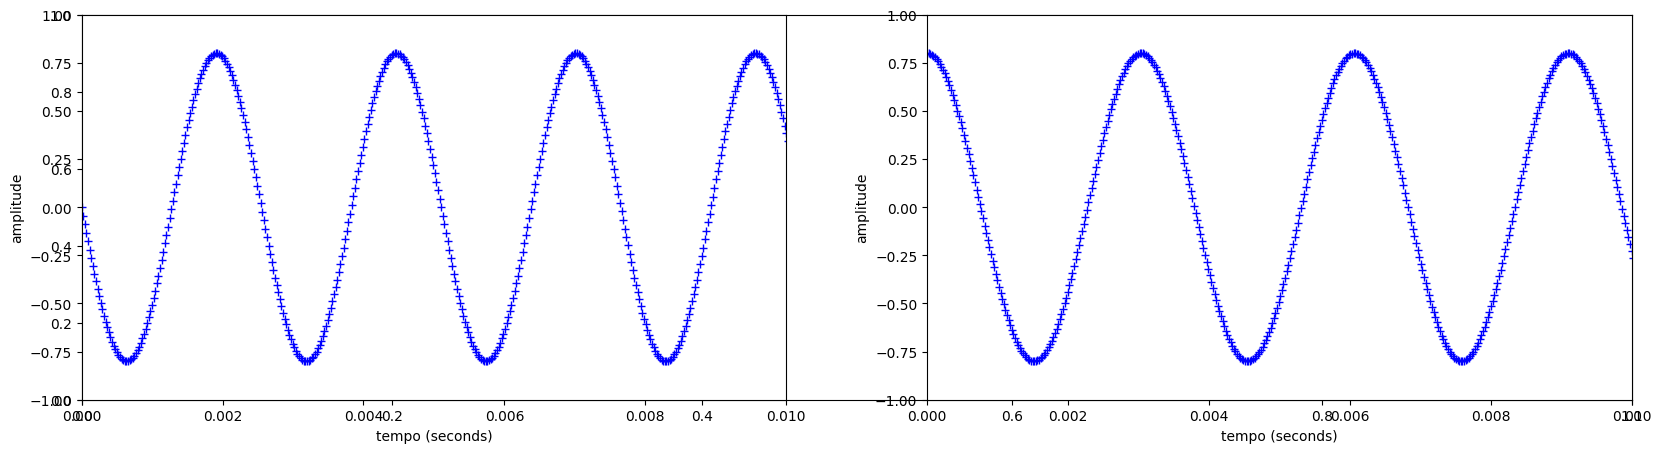

In [331]:
ipd.display(ipd.Audio(data=left_audio, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=right_audio, rate=taxa_amostragem))

draw_subplot(left_time, left_audio, right_time, right_audio)

In [332]:
ipd.display(ipd.Audio(data=[left_audio, right_audio], rate=taxa_amostragem))

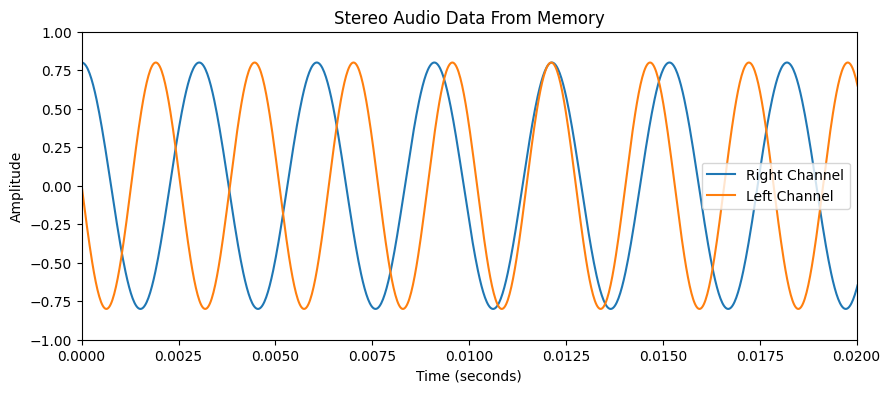

In [333]:
plt.figure(figsize=(10, 4))
plt.plot(right_time, right_audio, label='Right Channel')
plt.plot(left_time, left_audio, label='Left Channel')
plt.axis([-.0, 1/50, -1.0, 1.0])
plt.title('Stereo Audio Data From Memory')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

<a id="14"></a>

#### Salvando um arquivo PCM raw

Pulse Code Modulation


https://pt.wikipedia.org/wiki/Modula%C3%A7%C3%A3o_por_c%C3%B3digo_de_pulsos

In [334]:
import sys

amplitude = 32767.0
sample_rate = 44100
duration_seconds = 1
chunk_size = 1024
number_of_channels = 2
local_byte_order = sys.byteorder
data_type = 's16'

pcm_filename = f'test_{number_of_channels}c_{sample_rate}_{data_type}_{local_byte_order}.pcm'

print(f'nome do arquivo: {pcm_filename}')

nome do arquivo: test_2c_44100_s16_little.pcm


In [335]:
number_of_samples = sample_rate * duration_seconds
audio_data = np.zeros((number_of_samples, number_of_channels), dtype=np.short)

nota_sol = 391.995
audio_data[:, 0] = amplitude * np.sin(2.0 * np.pi * nota_sol * np.arange(number_of_samples) / sample_rate + np.pi)

nota_mi = 329.63
audio_data[:, 1] = amplitude * np.sin(2.0 * np.pi * nota_mi * np.arange(number_of_samples) / sample_rate+ np.pi/2)

interleaved_data = audio_data.ravel()

with open(pcm_filename, "wb") as pcm_file:
    interleaved_data.tofile(pcm_file)

#### Abrindo o arquivo PCM Raw

In [336]:
with open(pcm_filename, "rb") as pcm_file:
    byte_array = pcm_file.read()
    pcm_file.close()

dtype = np.int16
sample_size_bytes = np.dtype(dtype).itemsize
print(dtype, "sample size in bytes:", sample_size_bytes)

print("total byte size:", len(byte_array))
print("Frame size:", len(byte_array)//number_of_channels)

print("sample frequency:", len(byte_array)//(sample_size_bytes*number_of_channels))

<class 'numpy.int16'> sample size in bytes: 2
total byte size: 176400
Frame size: 88200
sample frequency: 44100


In [337]:
import struct

hexadecimal_representation = ' '.join(format(byte, '02x') for byte in byte_array[0:8])
print(f"Hexadecimal Representation (First 8 bytes): {hexadecimal_representation}")


Hexadecimal Representation (First 8 bytes): 00 00 ff 7f db f8 da 7f


In [372]:
left_channel_hex = byte_array[0:2]
right_channel_hex = byte_array[2:4]

left_channel_float = np.int16(int.from_bytes(left_channel_hex, byteorder='little')).astype(np.float16)
right_channel_float = np.int16(int.from_bytes(right_channel_hex, byteorder='little')).astype(np.float16)

In [373]:
print(f"Left Channel (float16): {left_channel_float}")
print(f"Right Channel (float16): {right_channel_float}")

Left Channel (float16): 0.0
Right Channel (float16): 32768.0


<a id="15"></a>

#### Validando as informações no ffprobe

In [339]:
print(f'filename:{pcm_filename}\n')

!ffprobe -hide_banner -f s16le -ar 44100 -ac 2 -i {pcm_filename}

filename:test_2c_44100_s16_little.pcm

[s16le @ 0x14162b090] Estimating duration from bitrate, this may be inaccurate
Input #0, s16le, from 'test_2c_44100_s16_little.pcm':
  Duration: 00:00:01.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le, 44100 Hz, 2 channels, s16, 1411 kb/s


<a id="16"></a>

#### Criando um arquivo wav a partir do pcm raw

In [340]:
!ffmpeg -hide_banner -f s16le -ar 44100 -ac 2 -i {pcm_filename} output.wav -y

[s16le @ 0x1207060c0] Estimating duration from bitrate, this may be inaccurate
Guessed Channel Layout for Input Stream #0.0 : stereo
Input #0, s16le, from 'test_2c_44100_s16_little.pcm':
  Duration: 00:00:01.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le, 44100 Hz, 2 channels, s16, 1411 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (pcm_s16le (native) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, wav, to 'output.wav':
  Metadata:
    ISFT            : Lavf60.3.100
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, stereo, s16, 1411 kb/s
    Metadata:
      encoder         : Lavc60.3.100 pcm_s16le
size=     172kB time=00:00:00.99 bitrate=1414.0kbits/s speed= 238x    
video:0kB audio:172kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.044218%


<a id="17"></a>

#### Abrindo o arquivo wav

| origem | http://soundfile.sapp.org/doc/WaveFormat/ |
| ---------------- | --------------------------------------- |
| wav file header | ![volume](pictures/Wav-data-header-information.png) |


In [341]:
import wave

with wave.open('output.wav') as w:
    framerate = w.getframerate()
    n_samples = w.getnframes()
    channels = w.getnchannels()
    width = w.getsampwidth()
    print('sampling rate:', framerate, 'Hz')
    print('length:', n_samples, 'samples')
    print('channels:', channels)
    print('sample width:', width, 'bytes')
    
    data = w.readframes(n_samples)

n_samples = w.getnframes()
t_audio = n_samples/framerate

sampling rate: 44100 Hz
length: 44100 samples
channels: 2
sample width: 2 bytes


In [351]:
print(len(data))
print(type(data))
print(f'first 8 {type(data)}',data[0:8])

176400
<class 'bytes'>
first 8 <class 'bytes'> b'\x00\x00\xff\x7f\xdb\xf8\xda\x7f'


In [366]:
signal_array = np.frombuffer(data, dtype=np.short)

In [367]:
print(len(signal_array), len(data), len(data)//2)
print(type(signal_array), type(signal_array[0]))
signal_array

88200 176400 88200
<class 'numpy.ndarray'> <class 'numpy.int16'>


array([     0,  32767,  -1829, ..., -24571,   2855, -23527], dtype=int16)

In [345]:
signal_array.shape

(88200,)

### Restaurando os frames intercalados

|  |
| ------ |
| ![audio frame](pictures/audio_frame.png) |

In [382]:
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]
print(l_channel.shape, r_channel.shape)

reshaped_audio_data = signal_array.reshape(-1, 2)
print(reshaped_audio_data.shape)

(44100,) (44100,)
(44100, 2)


In [385]:
print('método mais primitivo')
print(min(l_channel), max(l_channel))
print(min(r_channel), max(r_channel))

print('')

print('reshape usando numpy')
print(min(reshaped_audio_data[:, 0]), max(reshaped_audio_data[:, 0]))
print(min(reshaped_audio_data[:, 1]), max(reshaped_audio_data[:, 1]))

método mais primitivo
-32766 32766
-32766 32767

reshape usando numpy
-32766 32766
-32766 32767


In [386]:
times = np.linspace(start=0, stop=n_samples/framerate, num=n_samples)

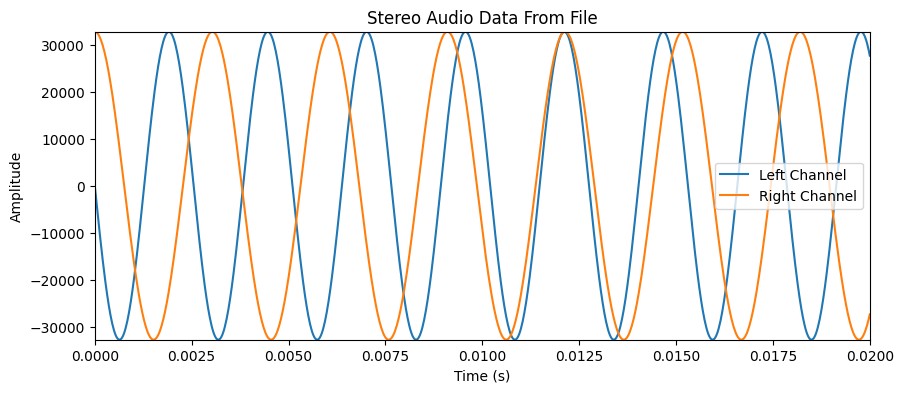

In [387]:
plt.figure(figsize=(10, 4))
plt.plot(times, l_channel, label='Left Channel')
plt.plot(times, r_channel, label='Right Channel')
plt.axis([0, 1/50, -32768.0, 32767.0])
plt.title('Stereo Audio Data From File')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [392]:
ipd.display(ipd.Audio(data=l_channel, rate=framerate))
ipd.display(ipd.Audio(data=r_channel, rate=framerate))
ipd.display(ipd.Audio(data=[l_channel, r_channel], rate=framerate))

#### Carregando novamente o arquivo pcm raw

In [393]:
pcm_filename = f'test_{number_of_channels}c_{sample_rate}_{data_type}_{local_byte_order}.pcm'
number_of_samples = taxa_amostragem * duracao

with open(pcm_filename, 'rb') as pcm_file:
    pcm_data = np.fromfile(pcm_file, dtype=np.short)

audio_data = np.reshape(pcm_data, (number_of_samples, number_of_channels))
print(audio_data.shape)
print(min(audio_data[:, 0]), max(audio_data[:, 0]))
print(min(audio_data[:, 1]), max(audio_data[:, 1]))


(44100, 2)
-32766 32766
-32766 32767


## Próximos passos: Audio 102 - Domínio da Frequência 

In [398]:
from scipy.fftpack import fft

def freq_to_note(freq):
    C0 = 16.35
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    h = round(12 * np.log2(freq / C0))
    octave = h // 12
    n = h % 12
    return note_names[n] + str(octave)

def get_dominant_frequency(signal, sample_rate):
    L = len(signal)
    yf = fft(signal)
    xf = np.linspace(0.0, sample_rate / 2.0, L // 2)
    freqs = 2.0 / L * np.abs(yf[:L // 2])
    dominant_freq = xf[np.argmax(freqs)]
    return dominant_freq

In [399]:
dominant_frequencies = []
for channel in range(number_of_channels):
    signal = audio_data[:, channel]
    dominant_freq = get_dominant_frequency(signal, sample_rate)
    dominant_frequencies.append(dominant_freq)
    note = freq_to_note(dominant_freq)
    print(f"Canal {channel+1} - Frequencia Dominante: {dominant_freq:.2f} Hz, Nota: {note}")

print(dominant_frequencies)

Canal 1 - Frequencia Dominante: 392.02 Hz, Nota: G4
Canal 2 - Frequencia Dominante: 330.01 Hz, Nota: E4
[392.01777858406274, 330.0149666651549]


#### Notas Musicais

In [397]:
A4 = 440.0
C0 = A4 * np.power(2, -4.75)
C0

16.351597831287414